<a href="https://colab.research.google.com/github/karolmetzker/ProjetoML/blob/main/Dry_Bean_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from scipy.io.arff import loadarff 
from scipy.io import arff

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression, LinearRegression

#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data =loadarff('/content/drive/My Drive/Colab Notebooks/Dry_Bean_Dataset.arff')
df = pd.DataFrame(data[0])
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,b'DERMASON'
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,b'DERMASON'
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,b'DERMASON'
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,b'DERMASON'


In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [29]:
print("Quantas classes existem nesse dataset?\n%d" %(len(df["Class"].unique())))#retorna valores únicos baseados numa tabela de dispersão
print("\nQuantas instâncias existem no dataset?\n%d" %(len(df))) #tamanho
print("\nQuantas caracteristicas(colunas) existem no dataset?\n%d" %(df.shape[1]))#retorna as dimensoes do data set,(150x5) como add [1] retorna 5, segundo valor da tupla, [0] retornaria o 150
print("\nQue features são essas?\n%s" %(str([k for k in df.keys()])))#uma por uma do nome das colunas
print("\nQual o numero de instâncias por classe?")
print(df["Class"].value_counts())#conta os valores od maior para o menor. 
#value_counts(normalize=True) > retorna a frequencia relativa dividindo todos os valores pela soma
#value_counts(bins=x) divide em grupos de x-1 em x-1 valores;(float)
#.value_counts(dropna=False) can also see NaN index values. dropna=True== apaga os vazios

Quantas classes existem nesse dataset?
7

Quantas instâncias existem no dataset?
13611

Quantas caracteristicas(colunas) existem no dataset?
17

Que features são essas?
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Qual o numero de instâncias por classe?
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: Class, dtype: int64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [1]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Class",
              height = 8).map(plt.scatter,
                              'MajorAxisLength',
                              'MinorAxisLength').add_legend()

NameError: ignored

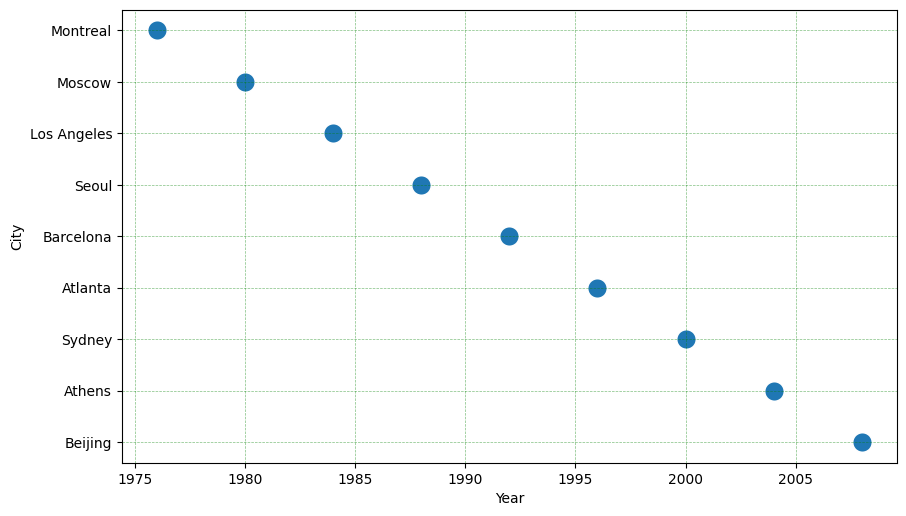

In [38]:
kd=df.groupby(["Year","City"]).size()
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x="Year",y="City",data=kd,s=200)
plt.grid(color='green', alpha=0.5, linestyle='dashed', linewidth=0.5)

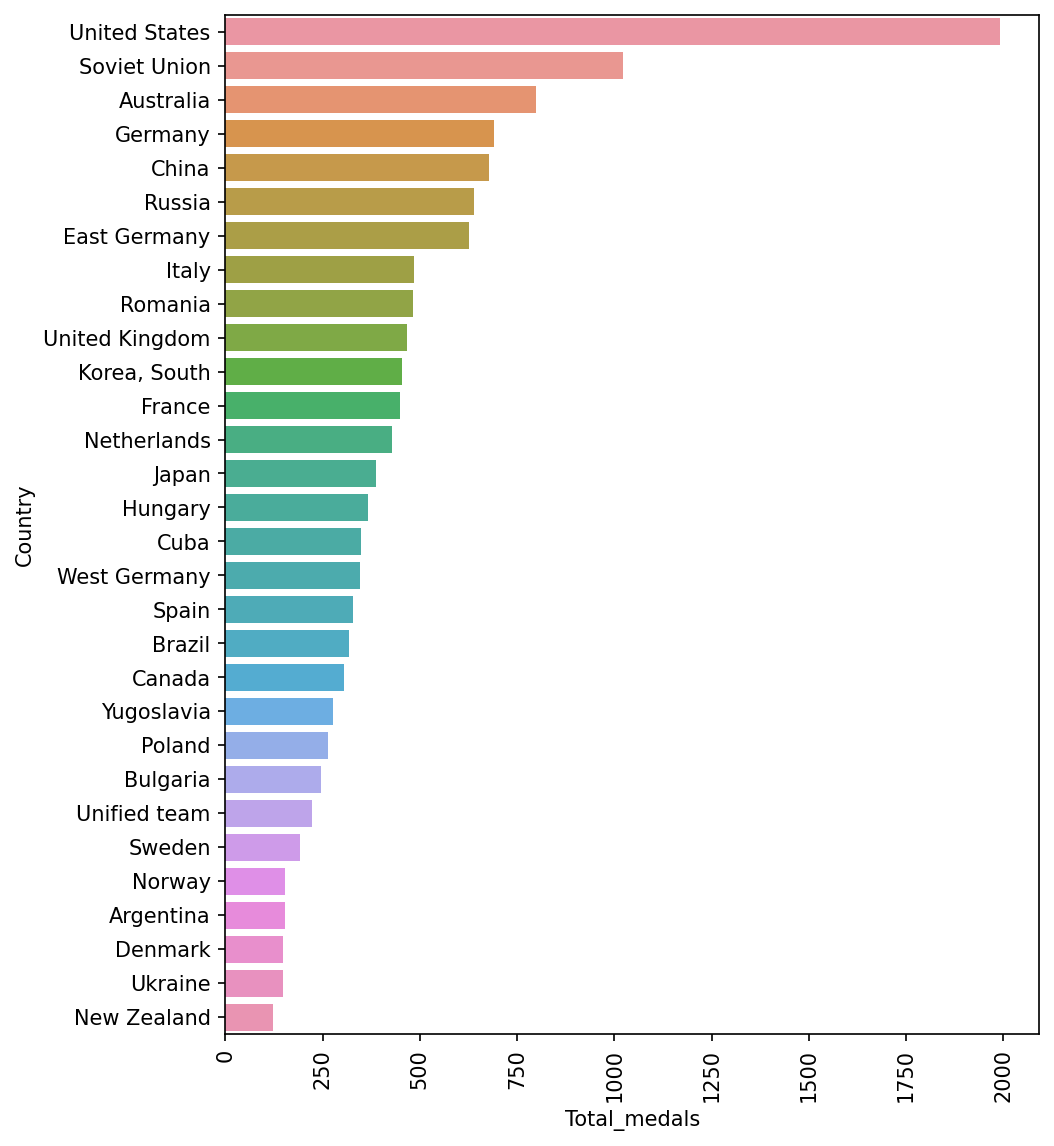

In [40]:
df1 = pd.get_dummies(df, columns = ['Medal'])
country_list = list(df1['Country'].unique())              

medal_gold = []
medal_silver = []
medal_bronze = []
for i in country_list:
    x = df1[df1["Country"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)
    silver = x.Medal_Silver.sum()
    medal_silver.append(silver)
    bronze = x.Medal_Bronze.sum()
    medal_bronze.append(bronze)
no_of_medals = pd.DataFrame({"Country": country_list,
    "medal_gold": medal_gold, 'medal_silver': medal_silver,
    'medal_bronze': medal_bronze})
no_of_medals["Total_medals"]=no_of_medals["medal_gold"]+no_of_medals["medal_silver"]+no_of_medals["medal_bronze"]
no_of_medals=no_of_medals.sort_values(by="Total_medals",ascending=False)

plt.figure(figsize=(7,9),dpi=150)
sns.barplot(y="Country",x="Total_medals",data=no_of_medals[:30])
plt.xticks(rotation=90);

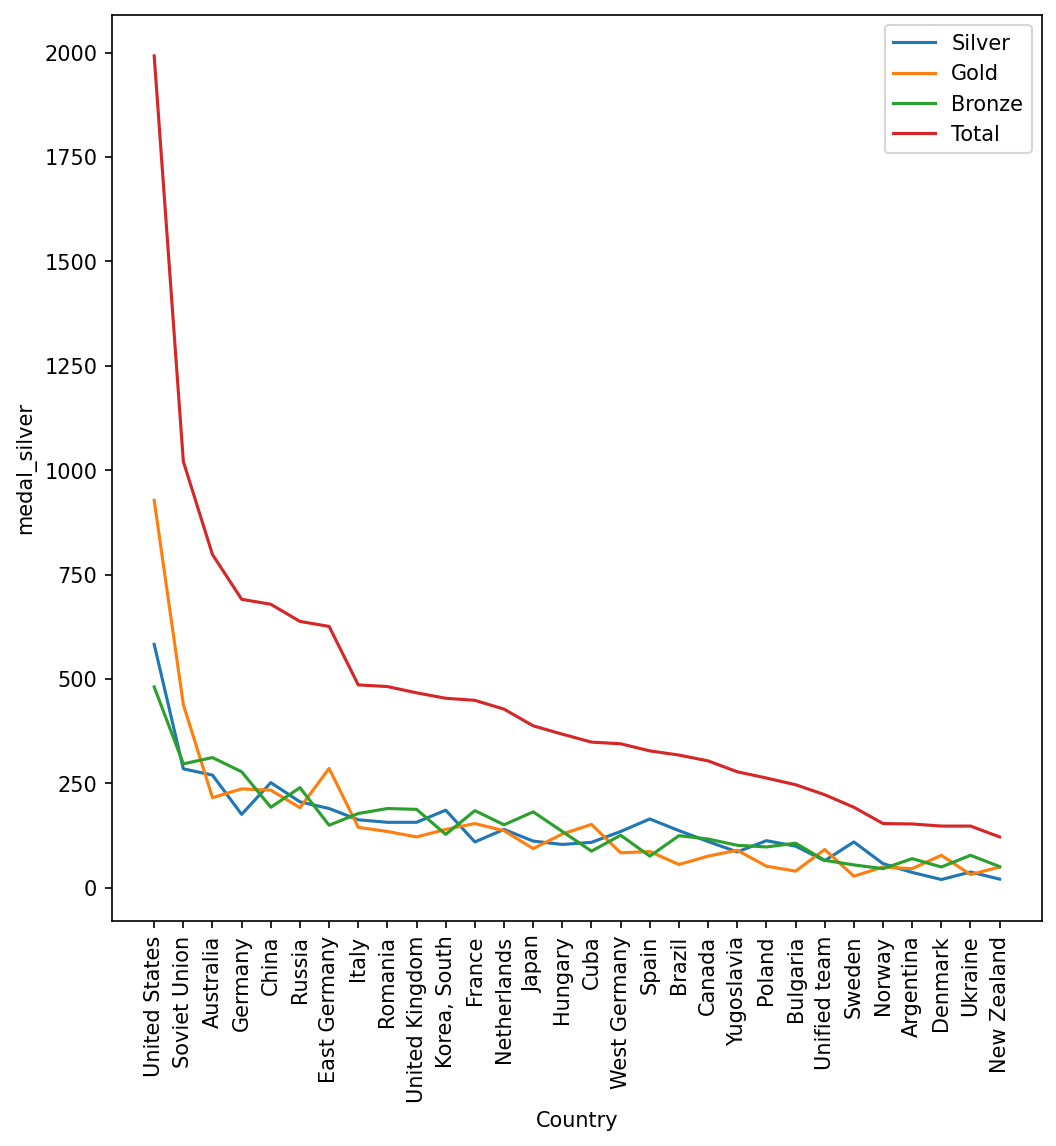

In [41]:
no_of_medals30 = no_of_medals[:30]
plt.figure(figsize=(8,8),dpi=150)
plt.xticks(rotation=90)
sns.lineplot(data=no_of_medals30, x="Country", y="medal_silver")
sns.lineplot(data=no_of_medals30, x="Country", y="medal_gold")
sns.lineplot(data=no_of_medals30, x="Country", y="medal_bronze")
sns.lineplot(data=no_of_medals30, x="Country", y="Total_medals")
plt.legend(["Silver", 'Gold', 'Bronze', 'Total'])

In [ ]:
# Medal Tally.
medal_tally = medal_tally_agnostic.groupby(['Year','Country'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally,
                     index = 'Country',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
medal_tally_pivot.loc[:,'All']

In [35]:
df.sort_values(by=df.Country.value_counts(),ascendng=False).head(10)

TypeError: ignored

In [30]:
plt.bar(df.Country.value_counts([:5]).index, df.Country.value_counts([:5]).values);

SyntaxError: ignored

In [25]:
df.dropna(inplace=True,axis=0)

df['Year'] = df['Year'].astype('int')

city_grouped_df = df.groupby(["City"])

top_athletes = dict()
for i,j in city_grouped_df:
    top_athletes[str(i)] = dict()
    top_athletes[str(i)]['Athlete'] = j['Athlete'].value_counts().idxmax()
    top_athletes[str(i)]['noof_medals'] = dict(j['Athlete'].value_counts()[:1])[top_athletes[str(i)]['Athlete']]
    top_athletes[str(i)]['year'] = j['Year'].value_counts().idxmax()
    
top=[]
for i in top_athletes:
    top.append(top_athletes[i]['Athlete'])

for i,j in city_grouped_df:
    country_grouped_df = j.groupby(['Country'])
    for k,l in country_grouped_df:
        athlete_grouped_df  = l.groupby(['Athlete'])
        for m,n in athlete_grouped_df:
            if str(m) in top and len(n)>=6:
                top_athletes[str(i)]['sport'] = n['Sport'].value_counts().idxmax()
                top_athletes[str(i)]['medals']={'Gold':0,'Silver':0,'Bronze':0}
                temp_dict = dict(n['Medal'].value_counts())
                for medal in  ["Gold","Silver","Bronze"]:
                    try:
                        top_athletes[str(i)]['medals'][medal] = temp_dict[medal]
                    except:
                        pass
                    
for i,j in top_athletes.items():
    print(i)
    print(j)

Athens
{'Athlete': 'PHELPS, Michael', 'noof_medals': 8, 'year': 2004, 'sport': 'Aquatics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 2}}
Atlanta
{'Athlete': 'NEMOV, Alexei', 'noof_medals': 6, 'year': 1996, 'sport': 'Gymnastics', 'medals': {'Gold': 2, 'Silver': 1, 'Bronze': 3}}
Barcelona
{'Athlete': 'SCHERBO, Vitaly', 'noof_medals': 6, 'year': 1992, 'sport': 'Gymnastics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 0}}
Beijing
{'Athlete': 'PHELPS, Michael', 'noof_medals': 8, 'year': 2008, 'sport': 'Aquatics', 'medals': {'Gold': 8, 'Silver': 0, 'Bronze': 0}}
Los Angeles
{'Athlete': 'LI, Ning', 'noof_medals': 6, 'year': 1984, 'sport': 'Gymnastics', 'medals': {'Gold': 3, 'Silver': 2, 'Bronze': 1}}
Montreal
{'Athlete': 'ANDRIANOV, Nikolay', 'noof_medals': 7, 'year': 1976, 'sport': 'Gymnastics', 'medals': {'Gold': 4, 'Silver': 2, 'Bronze': 1}}
Moscow
{'Athlete': 'DITYATIN, Aleksandr', 'noof_medals': 8, 'year': 1980, 'sport': 'Gymnastics', 'medals': {'Gold': 3, 'Silver': 4, 'Bronze': 1}}


In [ ]:
US = dict()
Russia = dict()
country_data = df.groupby(['Country'])
for i,j in country_data:
    if i == 'United States':
        US = dict(j['Sport'].value_counts())
    elif i == 'Soviet Union' or i == 'Russia' or i == 'Unified team':
        sport_data = j.groupby(['Sport'])
        for k,l in sport_data:
            if k in Russia:
                Russia[k]+=len(l)
            else:
                Russia[k]=len(l)
 

us_df = pd.DataFrame({'Sport':[],'medals':[]})
for i in US:
    us_df.loc[len(us_df.index)] = [i,int(US[i])] 
    
ussr_df = pd.DataFrame({'Sport':[],'medals':[]})
for i in Russia:
    ussr_df.loc[len(ussr_df.index)] = [i,int(Russia[i])] 
    

gender_dict = dict()
for i,j in city_grouped_data:
    gender_dict[j.Year.max()]=dict()
    gender_data = j.groupby(['Gender'])
    for k,l in gender_data:
        gender_dict[j.Year.max()][k]=dict()
        if k == 'Men':
            medal_data = l.groupby(['Medal'])
            for m,n in medal_data:
                gender_dict[j.Year.max()][k][m]=len(n)
        else:
            medal_data = l.groupby(['Medal'])
            for m,n in medal_data:
                gender_dict[j.Year.max()][k][m]=len(n)
     
    
total_gender_medals = dict()
for i,j in gender_dict.items():
    total_gender_medals[i]=dict()
    for k,l in j.items():
        count=0
        for m in l.values():
            count+=m
        total_gender_medals[i][k] = count
        
        
total_gender_medals

In [20]:
df.groupby('Gender').value()

AttributeError: ignored

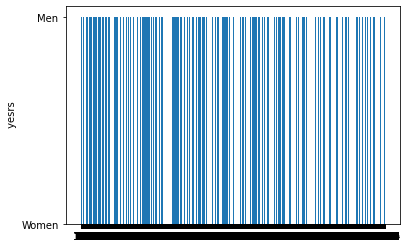

In [19]:
plt.bar(range(len(df['Country'])) , df['Gender'])
plt.xticks(range(len(df['Country'])))
plt.ylabel(" yesrs")
plt.show()

In [ ]:
freq_C = df(["Country","Gender"].size()
print(freq_C)

SyntaxError: ignored

IndexError: ignored

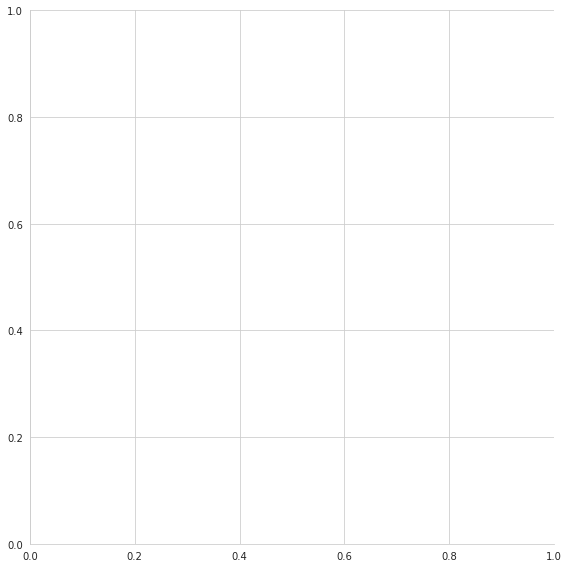

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Medal",
              height = 8).map(plt.scatter,
                              'Year',
                              'freq_C').add_legend()

In [ ]:
X = df.iloc[:,[0,1]]
y = df.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
renda_zero = df[df['Renda'] == 0].groupby(['UF']).size()
ax = renda_zero.plot.bar()
ax.figure.set_size_inches(10,6)

In [ ]:
df

TypeError: ignored

In [ ]:
df.groupby("Country").agg({'Gender':'count'})

,Gender
Country,


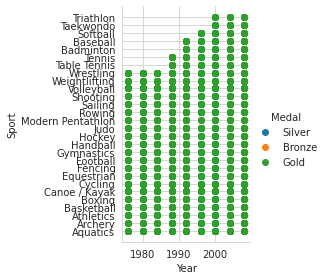

In [ ]:
# Distribuição das classes pelas features Wifes_education e Number_of_children_ever_born
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Medal",
              height = 4).map(plt.scatter,
                              'Year',
                              'Sport').add_legend()

IndexError: ignored

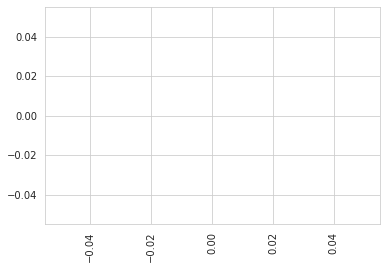

In [ ]:
Medal_g = df[df['Gender'] == 0].groupby(['Medal']).size()
ax = Medal_g.plot.bar()
ax.figure.set_size_inches(10,6)

In [ ]:
#Medal vs Gender
df.groupby(['Gender'])['Medal'].mean()

TypeError: ignored